In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [38]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为 SimHei（黑体）
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

In [39]:
file_path = '2018-09 shanghai house price(intercept).xlsx'
df = pd.read_excel(file_path)


In [42]:
df_cleaned = df.dropna()


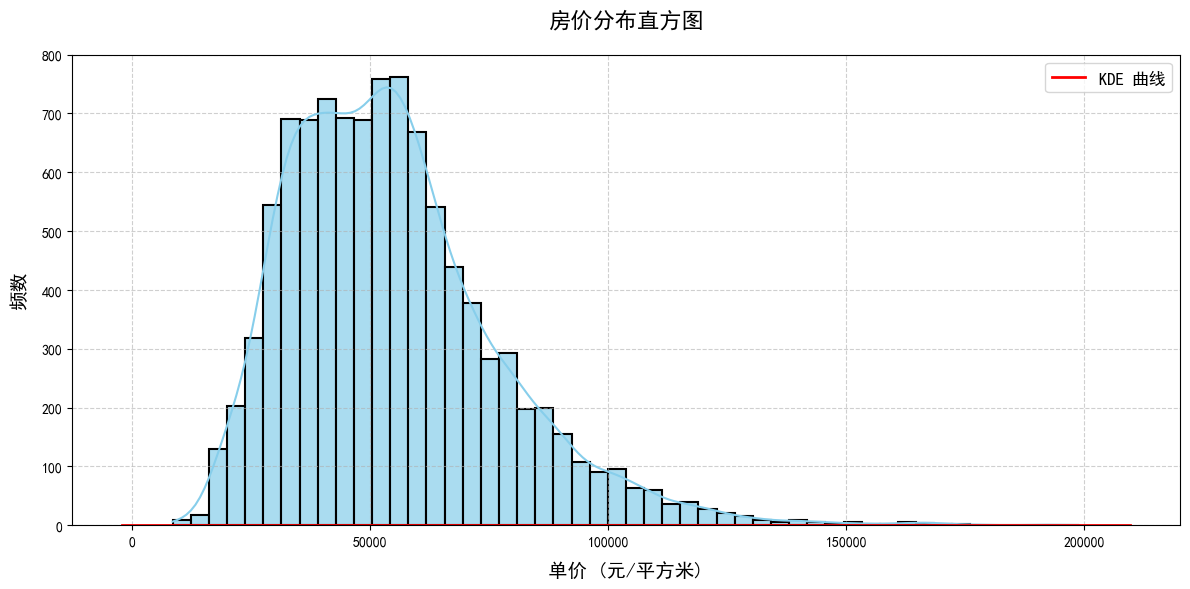

In [43]:
# 绘制房价分布直方图
plt.figure(figsize=(12, 6))
sns.histplot(df['单价'], bins=50, kde=True, color='skyblue', edgecolor='black', alpha=0.7, linewidth=1.5)
# 设置标题和标签
plt.title('房价分布直方图', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('单价 (元/平方米)', fontsize=14, labelpad=10)
plt.ylabel('频数', fontsize=14, labelpad=10)
# 添加网格线
plt.grid(True, linestyle='--', alpha=0.6)
# 优化 KDE 曲线
kde = sns.kdeplot(df['单价'], color='red', linewidth=2, label='KDE 曲线')
kde.set_ylim(0)  # 确保 KDE 曲线从 y=0 开始
# 添加图例
plt.legend(fontsize=12)
# 调整布局
plt.tight_layout()
# 显示图表
plt.show()

C:\Users\20353\AppData\Local\Temp\ipykernel_18596\4239754466.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=district_median_price.index, y=district_median_price.values, palette='viridis')  # 使用颜色映射


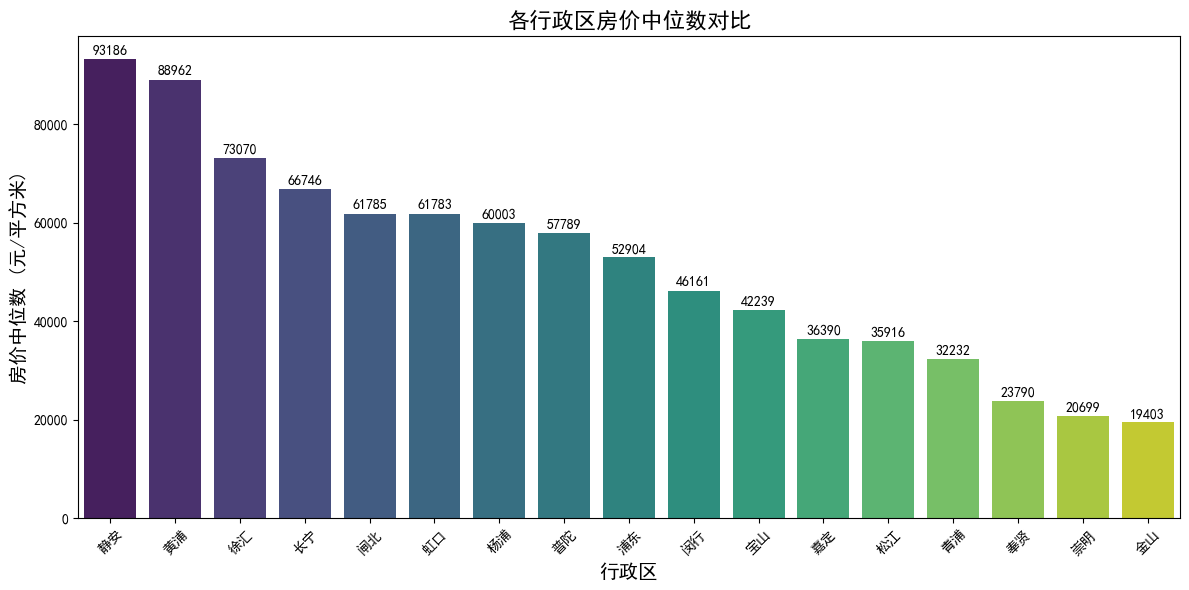

In [41]:
# 按行政区计算房价中位数
district_median_price = df.groupby('行政区')['单价'].median().sort_values(ascending=False)
# 绘制柱状图
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=district_median_price.index, y=district_median_price.values, palette='viridis')  # 使用颜色映射
# 添加数值标签
for i, value in enumerate(district_median_price.values):
    ax.text(i, value + 500, f'{value:.0f}', ha='center', va='bottom', fontsize=10)  # 在柱子顶部添加数值
# 设置标题和标签
plt.title('各行政区房价中位数对比', fontsize=16)
plt.xlabel('行政区', fontsize=14)
plt.ylabel('房价中位数 (元/平方米)', fontsize=14)
plt.xticks(rotation=45)  # 旋转x轴标签
plt.tight_layout()  # 自动调整布局
plt.show()

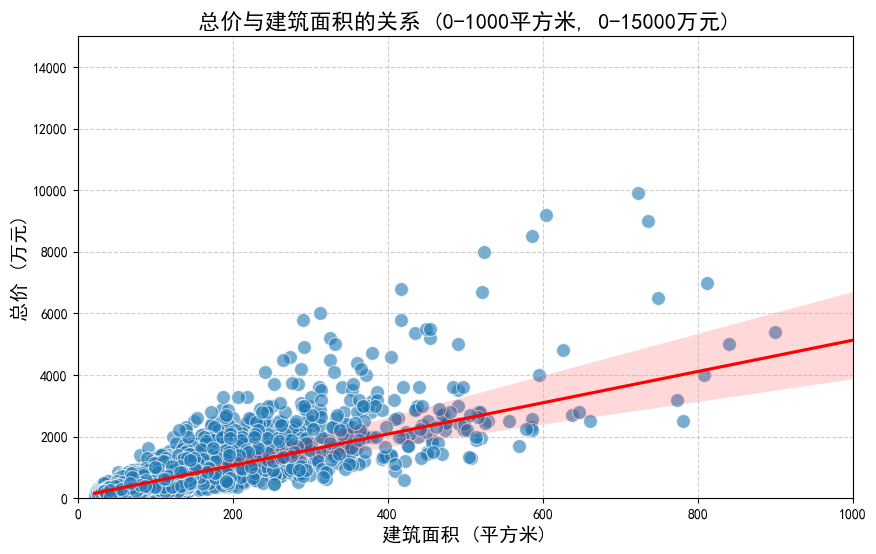

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='建筑面积', y='总价w', data=df, alpha=0.6, s=100)
sns.regplot(x='建筑面积', y='总价w', data=df, scatter=False, color='red')  # 添加回归线

# 限制横坐标范围，只显示建筑面积 0-1000 平方米的部分
plt.xlim(left=0, right=1000)

# 限制纵坐标范围，只显示总价 0-15000 万元的部分
plt.ylim(bottom=0, top=15000)

plt.title('总价与建筑面积的关系 (0-1000平方米, 0-15000万元)', fontsize=16)
plt.xlabel('建筑面积 (平方米)', fontsize=14)
plt.ylabel('总价 (万元)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)  # 添加网格线
plt.show()

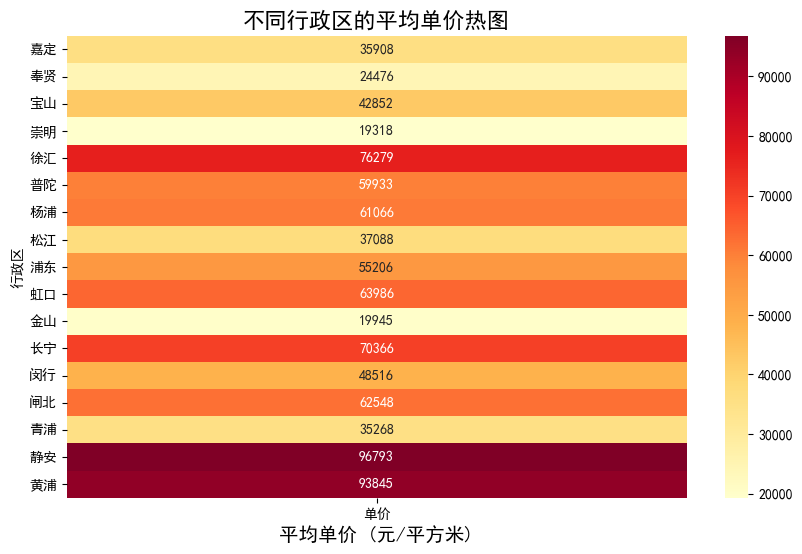

In [61]:
# 计算每个行政区的平均单价
avg_price_by_district = df.groupby('行政区')['单价'].mean().reset_index()

# 绘制热图
plt.figure(figsize=(10, 6))
sns.heatmap(avg_price_by_district.set_index('行政区'), annot=True, cmap='YlOrRd', fmt='.0f')
plt.title('不同行政区的平均单价热图', fontsize=16)
plt.xlabel('平均单价 (元/平方米)', fontsize=14)
plt.show()

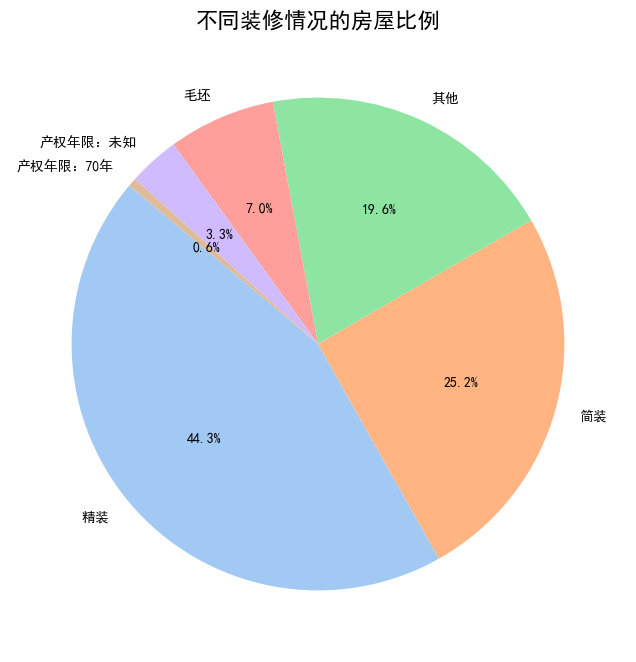

In [62]:
# 计算不同装修情况的房屋数量
decoration_counts = df['装修情况'].value_counts()

# 绘制饼图
plt.figure(figsize=(8, 8))
plt.pie(decoration_counts, labels=decoration_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('不同装修情况的房屋比例', fontsize=16)
plt.show()

C:\Users\20353\AppData\Local\Temp\ipykernel_18596\825922252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='行政区', y='单价', data=df, palette='Set3')


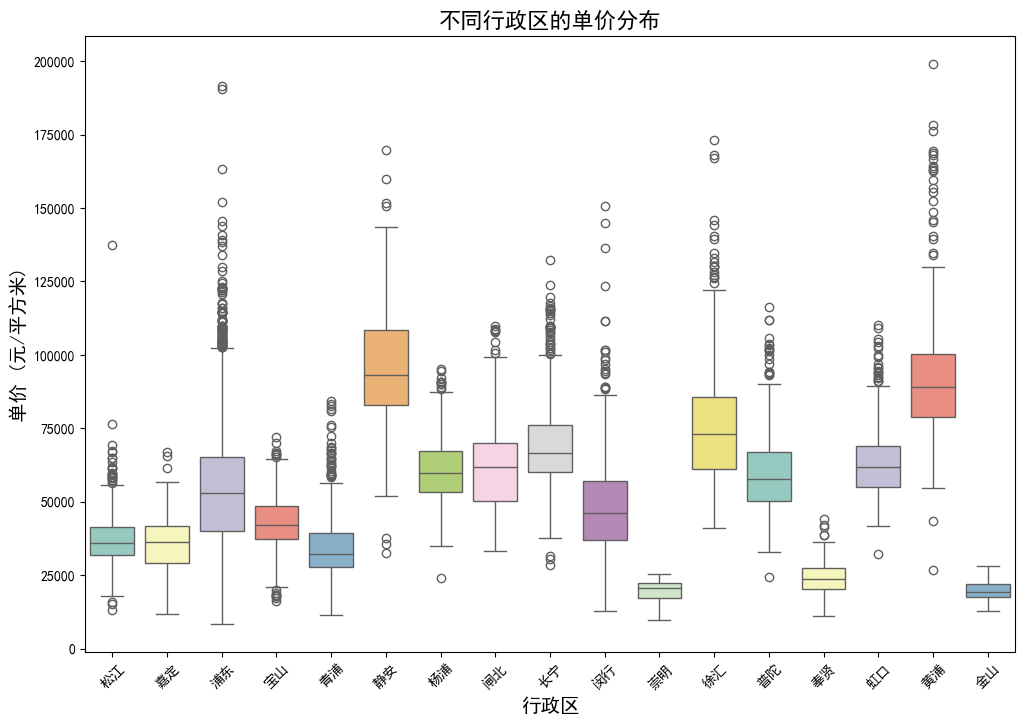

In [64]:
# 绘制箱线图
plt.figure(figsize=(12, 8))
sns.boxplot(x='行政区', y='单价', data=df, palette='Set3')
plt.title('不同行政区的单价分布', fontsize=16)
plt.xlabel('行政区', fontsize=14)
plt.ylabel('单价 (元/平方米)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

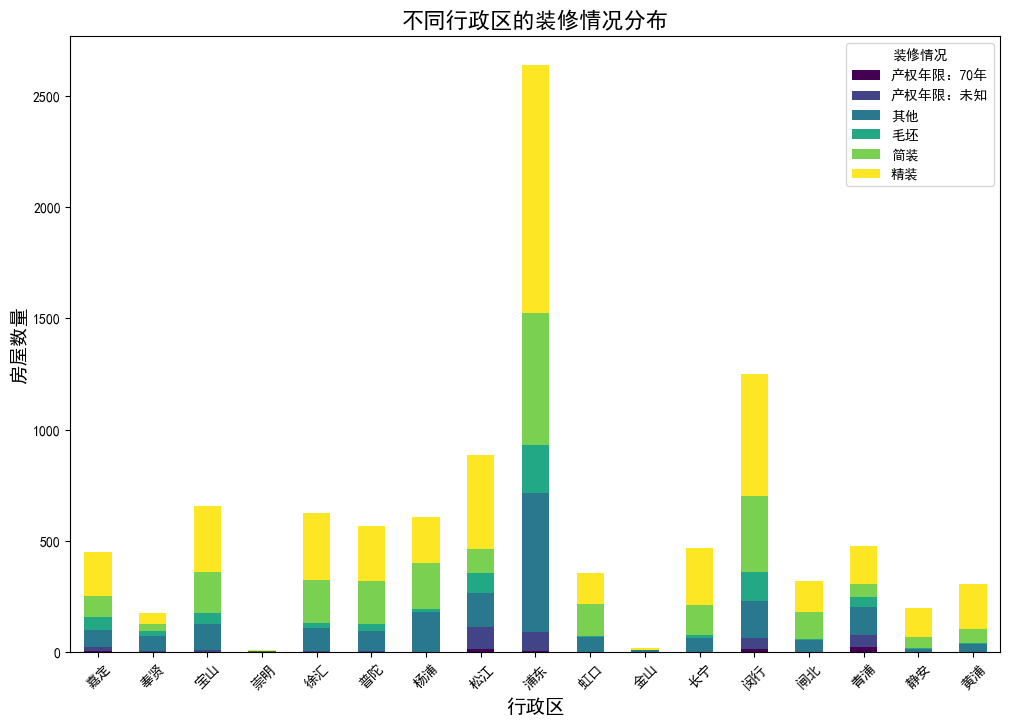

In [65]:
# 计算不同行政区的装修情况分布
decoration_distribution = df.groupby(['行政区', '装修情况']).size().unstack()

# 绘制堆叠条形图
decoration_distribution.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('不同行政区的装修情况分布', fontsize=16)
plt.xlabel('行政区', fontsize=14)
plt.ylabel('房屋数量', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='装修情况')
plt.show()

Index(['单价', '总价w', '首付w', '房屋户型', '所在楼层', '建筑面积', '装修情况', '配备电梯', '行政区', '板块',
       '小区名称'],
      dtype='object')


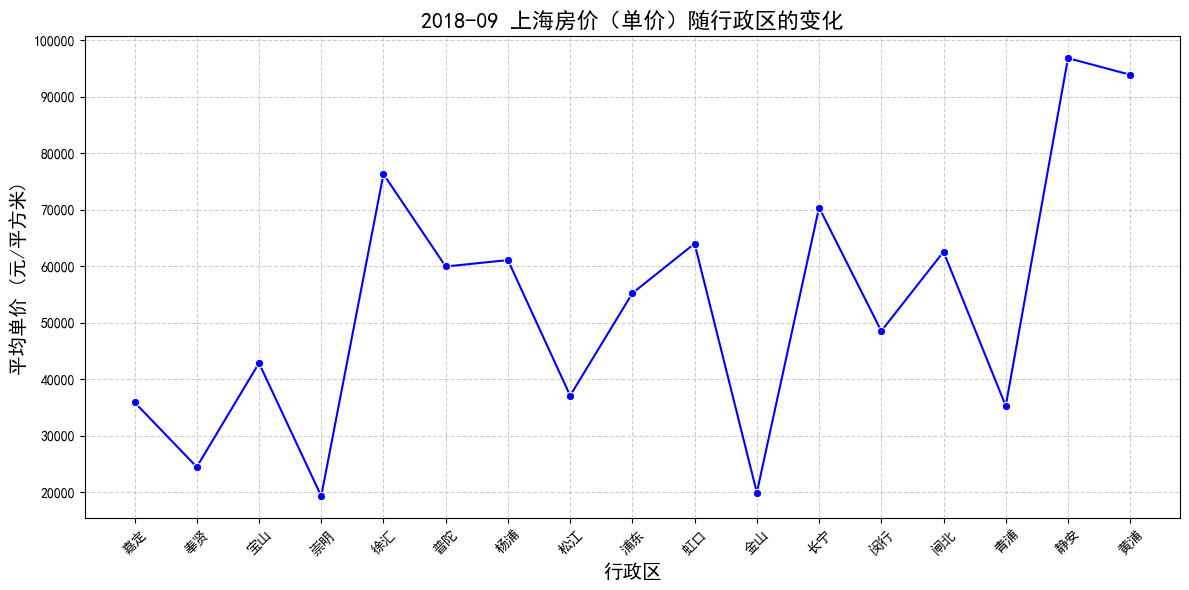

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取 Excel 文件
file_path = '2018-09 shanghai house price(intercept).xlsx'
df = pd.read_excel(file_path)

# 检查数据列名
print(df.columns)  # 确保文件中有 '行政区' 和 '单价' 列

# 按行政区计算平均房价（单价）
avg_price_by_district = df.groupby('行政区')['单价'].mean().reset_index()

# 创建折线图
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_price_by_district, x='行政区', y='单价', marker='o', color='b')

# 添加标题和标签
plt.title('2018-09 上海房价（单价）随行政区的变化', fontsize=16)
plt.xlabel('行政区', fontsize=14)
plt.ylabel('平均单价 (元/平方米)', fontsize=14)

# 旋转 x 轴标签
plt.xticks(rotation=45)

# 显示网格
plt.grid(True, linestyle='--', alpha=0.6)

# 显示图表
plt.tight_layout()
plt.show()